<a href="https://colab.research.google.com/github/PanchenkoVI/tensorflow_flowers/blob/main/Tensorflow_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import sympy
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [10]:
# from google.colab import files
# files.upload()

In [3]:
# !pip install kaggle

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [8]:
# import kaggle
# from kaggle.api.kaggle_api_extended import KaggleApi
# api = KaggleApi()
# api.authenticate()
# api.dataset_download_files('utkarshsaxenadn/flower-classification-5-classes-roselilyetc', 'HAM10000_images_part_2')

In [9]:
# import zipfile
# path_to_zip_file = 'HAM10000_images_part_2/flower-classification-5-classes-roselilyetc.zip'
# with zipfile.ZipFile(path_to_zip_file, 'r') as z:
#     z.extractall('HAM10000_images_part_1')

In [11]:
# !ls HAM10000_images_part_1/Flower_Classification_V2/V2/TFRecords

In [12]:
import os

# Путь к папке, которую вы хотите проверить
folder_path = './HAM10000_images_part_1/Flower_Classification_V2/V2/Training Data/'
# folder_path = './HAM10000_images_part_1/Flower_Classification_V2/V2/Testing Data/'
# folder_path = './HAM10000_images_part_1/Flower_Classification_V2/V2/Validation Data/'


# Список поддерживаемых расширений изображений
supported_extensions = ['.jpeg', '.png', '.gif', '.bmp']

# Функция для проверки наличия неподдерживаемых файлов
def check_unsupported_files(folder_path, supported_extensions):
    unsupported_files = []
    for file in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file)):
            file_extension = os.path.splitext(file)[-1].lower()
            if file_extension not in supported_extensions:
                unsupported_files.append(file)
    return unsupported_files

# Проверка наличия неподдерживаемых файлов
unsupported_files = check_unsupported_files(folder_path, supported_extensions)

# Вывод результатов
if unsupported_files:
    print("Найдены неподдерживаемые файлы:")
    for file in unsupported_files:
        print(file)
else:
    print("Все файлы в папке имеют поддерживаемые расширения.")


Все файлы в папке имеют поддерживаемые расширения.


In [6]:
import os

image_extensions = ['.jpg', '.jpeg', '.png', '.gif']

from PIL import Image

def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.convert('RGB')  # Преобразование в RGB, если изображение в другом режиме
    image = image.resize((224, 224))  # Приведение к ожидаемому размеру
    image = np.array(image)  # Преобразование в массив NumPy
    image = image / 255.0  # Нормализация пикселей (если это необходимо)
    return image

# Функция для подсчета количества фотографий в папке
def count_images_in_folder(folder_path):
    image_count = 0
    for file in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file)):
            if any(file.lower().endswith(ext) for ext in image_extensions):
                image_count += 1
                # preprocess_image(folder_path+'/'+file)
    return image_count

# Функция для подсчета общего количества фотографий во всех подпапках
def count_total_images(root_folder):
    total_count = 0
    for foldername in os.listdir(root_folder):
        folder_path = os.path.join(root_folder, foldername)
        if os.path.isdir(folder_path):
            folder_count = count_images_in_folder(folder_path)
            total_count += folder_count
            print(f"Folder '{foldername}' has {folder_count} images.")
    return total_count

root_folder1 = './HAM10000_images_part_1/Flower_Classification_V2/V2/Training Data/'
total_images = count_total_images(root_folder1)
print(f"Training_Data images in all folders: {total_images}")
print('\n')
root_folder2 = './HAM10000_images_part_1/Flower_Classification_V2/V2/Testing Data/'
total_images = count_total_images(root_folder2)
print(f"Testing_Data images in all folders: {total_images}")
print('\n')
root_folder3 = './HAM10000_images_part_1/Flower_Classification_V2/V2/Validation Data/'
total_images = count_total_images(root_folder3)
print(f"Validation_Data images in all folders: {total_images}")

Folder 'Sunflower' has 1500 images.
Folder 'Iris' has 1500 images.
Folder 'Marigold' has 1500 images.
Folder 'Aster' has 1500 images.
Folder 'Rose' has 1500 images.
Folder 'Daisy' has 1500 images.
Folder 'Lavender' has 1500 images.
Folder 'Poppy' has 1500 images.
Folder 'Orchid' has 1500 images.
Folder 'Lily' has 1500 images.
Training_Data images in all folders: 15000


Folder 'Sunflower' has 328 images.
Folder 'Iris' has 317 images.
Folder 'Marigold' has 108 images.
Folder 'Aster' has 146 images.
Folder 'Rose' has 269 images.
Folder 'Daisy' has 260 images.
Folder 'Lavender' has 217 images.
Folder 'Poppy' has 158 images.
Folder 'Orchid' has 202 images.
Folder 'Lily' has 350 images.
Testing_Data images in all folders: 2355


Folder 'Sunflower' has 500 images.
Folder 'Iris' has 500 images.
Folder 'Marigold' has 500 images.
Folder 'Aster' has 500 images.
Folder 'Rose' has 500 images.
Folder 'Daisy' has 500 images.
Folder 'Lavender' has 500 images.
Folder 'Poppy' has 500 images.
Folder 'Or

In [7]:
batch_size = 128
width = 180
height = 180

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Нормализация значений пикселей
    validation_split=0.2  # Разбиение на тренировочный и валидационный датасеты
)

train_ds = datagen.flow_from_directory(
    root_folder1,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'
)

Found 12000 images belonging to 10 classes.


In [9]:
val_ds = datagen.flow_from_directory(
    root_folder1,
    target_size=(height, width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation'
)

Found 3000 images belonging to 10 classes.


In [10]:
print(f"train_ds num_classes = {train_ds.num_classes}")
print(f"train_ds class_indices = {train_ds.class_indices}")

print(f"val_ds num_classes =   {val_ds.num_classes}")
print(f"val_ds class_indices =   {val_ds.class_indices}")

train_ds num_classes = 10
train_ds class_indices = {'Aster': 0, 'Daisy': 1, 'Iris': 2, 'Lavender': 3, 'Lily': 4, 'Marigold': 5, 'Orchid': 6, 'Poppy': 7, 'Rose': 8, 'Sunflower': 9}
val_ds num_classes =   10
val_ds class_indices =   {'Aster': 0, 'Daisy': 1, 'Iris': 2, 'Lavender': 3, 'Lily': 4, 'Marigold': 5, 'Orchid': 6, 'Poppy': 7, 'Rose': 8, 'Sunflower': 9}


In [9]:
# # cache
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
# create model
from tensorflow.keras.models import Sequential

num_classes = train_ds.num_classes
model = Sequential([
	layers.experimental.preprocessing.Rescaling(1./255, input_shape=(height, width, 3)),

	# аугментация
	layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(height, width, 10)),
	layers.experimental.preprocessing.RandomRotation(0.1),
	layers.experimental.preprocessing.RandomZoom(0.1),
	layers.experimental.preprocessing.RandomContrast(0.2),

	tf.keras.layers.BatchNormalization(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Dropout(0.25),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(num_classes, activation='softmax')

	# layers.Flatten(),
	# layers.Dense(32, activation='relu'),
	# layers.Dense(num_classes)
])

model.compile(
	optimizer='adam',
	loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 random_flip (RandomFlip)    (None, 180, 180, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 180, 180, 3)      0         
 tion)                                                           
                                                                 
 random_zoom (RandomZoom)    (None, 180, 180, 3)       0         
                                                                 
 random_contrast (RandomCont  (None, 180, 180, 3)      0         
 rast)                                                           
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      1

In [ ]:
# train the model
epochs = 20 # количество эпох тренировки
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs)

# Epoch 1/20
# 94/94 [==============================] - 85s 262ms/step - loss: 2.0088 - accuracy: 0.2801 - val_loss: 2.2969 - val_accuracy: 0.1499
# Epoch 2/20
# 94/94 [==============================] - 24s 250ms/step - loss: 1.6615 - accuracy: 0.4261 - val_loss: 2.4074 - val_accuracy: 0.1413
# Epoch 3/20
# 94/94 [==============================] - 24s 250ms/step - loss: 1.5111 - accuracy: 0.4813 - val_loss: 2.5076 - val_accuracy: 0.0857
# Epoch 4/20
# 94/94 [==============================] - 24s 254ms/step - loss: 1.4321 - accuracy: 0.5057 - val_loss: 2.4268 - val_accuracy: 0.1328
# Epoch 5/20
# 94/94 [==============================] - 23s 239ms/step - loss: 1.3617 - accuracy: 0.5362 - val_loss: 2.5380 - val_accuracy: 0.1413
# Epoch 6/20
# 94/94 [==============================] - 24s 249ms/step - loss: 1.3123 - accuracy: 0.5583 - val_loss: 1.7519 - val_accuracy: 0.4004
# Epoch 7/20
# 94/94 [==============================] - 24s 253ms/step - loss: 1.2744 - accuracy: 0.5678 - val_loss: 1.4757 - val_accuracy: 0.4882
# Epoch 8/20
# 94/94 [==============================] - 24s 253ms/step - loss: 1.2168 - accuracy: 0.5888 - val_loss: 1.2279 - val_accuracy: 0.6210
# Epoch 9/20
# 94/94 [==============================] - 23s 242ms/step - loss: 1.1854 - accuracy: 0.6037 - val_loss: 1.3292 - val_accuracy: 0.5610
# Epoch 10/20
# 94/94 [==============================] - 24s 256ms/step - loss: 1.1425 - accuracy: 0.6190 - val_loss: 1.1536 - val_accuracy: 0.6274
# Epoch 11/20
# 94/94 [==============================] - 23s 239ms/step - loss: 1.1252 - accuracy: 0.6264 - val_loss: 1.1093 - val_accuracy: 0.6445
# Epoch 12/20
# 94/94 [==============================] - 24s 253ms/step - loss: 1.1208 - accuracy: 0.6217 - val_loss: 1.1108 - val_accuracy: 0.6124
# Epoch 13/20
# 94/94 [==============================] - 22s 230ms/step - loss: 1.0834 - accuracy: 0.6407 - val_loss: 1.1129 - val_accuracy: 0.6338
# Epoch 14/20
# 94/94 [==============================] - 24s 248ms/step - loss: 1.0447 - accuracy: 0.6543 - val_loss: 1.0846 - val_accuracy: 0.6467
# Epoch 15/20
# 94/94 [==============================] - 24s 251ms/step - loss: 1.0346 - accuracy: 0.6570 - val_loss: 1.0932 - val_accuracy: 0.6531
# Epoch 16/20
# 94/94 [==============================] - 24s 253ms/step - loss: 1.0224 - accuracy: 0.6572 - val_loss: 1.0362 - val_accuracy: 0.6745
# Epoch 17/20
# 94/94 [==============================] - 22s 232ms/step - loss: 0.9932 - accuracy: 0.6724 - val_loss: 1.0714 - val_accuracy: 0.6574
# Epoch 18/20
# 94/94 [==============================] - 24s 258ms/step - loss: 0.9893 - accuracy: 0.6678 - val_loss: 1.0572 - val_accuracy: 0.6767
# Epoch 19/20
# 94/94 [==============================] - 23s 241ms/step - loss: 0.9618 - accuracy: 0.6830 - val_loss: 1.0640 - val_accuracy: 0.6510
# Epoch 20/20
# 94/94 [==============================] - 24s 255ms/step - loss: 0.9322 - accuracy: 0.6874 - val_loss: 1.0795 - val_accuracy: 0.6510

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 [==============================] - 51s 375ms/step - loss: 1.9268 - accuracy: 0.3020 - val_loss: 2.7415 - val_accuracy: 0.1000
Epoch 2/20
94/94 [==============================] - 29s 312ms/step - loss: 1.6523 - accuracy: 0.4178 - val_loss: 2.7381 - val_accuracy: 0.0977
Epoch 3/20
94/94 [==============================] - 29s 305ms/step - loss: 1.5589 - accuracy: 0.4527 - val_loss: 2.8951 - val_accuracy: 0.0973
Epoch 4/20
94/94 [==============================] - 29s 306ms/step - loss: 1.4917 - accuracy: 0.4827 - val_loss: 2.4096 - val_accuracy: 0.1447
Epoch 5/20
94/94 [==============================] - 29s 311ms/step - loss: 1.4472 - accuracy: 0.5062 - val_loss: 2.1305 - val_accuracy: 0.2330
Epoch 6/20
94/94 [==============================] - 29s 306ms/step - loss: 1.3943 - accuracy: 0.5255 - val_loss: 1.8121 - val_accuracy: 0.3620
Epoch 7/20
94/94 [==============================] - 29s 305ms/step - loss: 1.3590 - accuracy: 0.5436 - val_loss: 1.4296 - val_accuracy: 0.4940
Epoch 8/20

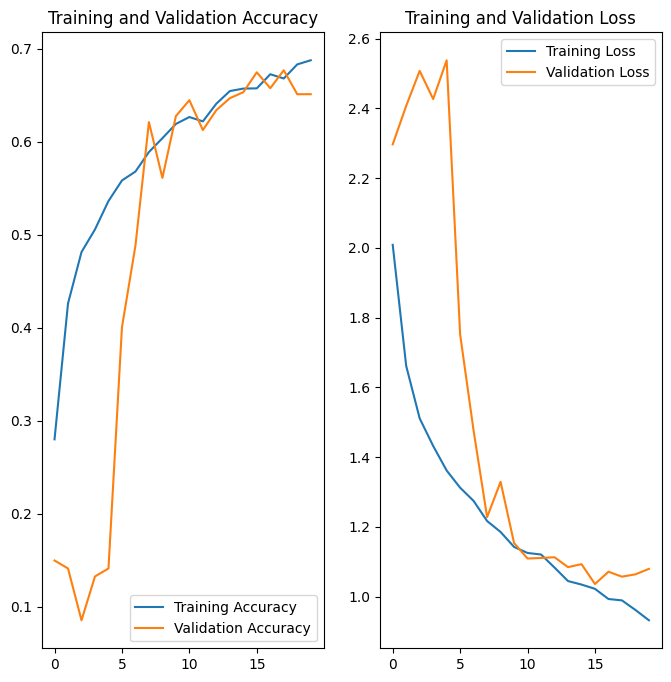

In [114]:
# visualize training and validation results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# проверяем на новом изображении

# # load image
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)

# # make predictions
# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# # print inference result
# print("На изображении скорее всего {} ({:.2f}% вероятность)".format(
# 	class_names[np.argmax(score)],
# 	100 * np.max(score)))

# # show the image itself
# img.show()

In [ ]:
# экспорт модели
# from google.colab import files

# model_file_name = "my_flowers_model.h5"

# # save model
# model.save(model_file_name)

# # download model
# files.download(model_file_name)